## Outlier Detection Notebook: 
##### Aims at detecting outliers for each product by analyzing quantity sold on promo days vs no promo days individually 

In [1]:
# Reading all stored magic variables
%store -r

# Importing packages
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize':(8,8)})
%time

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.44 µs


In [2]:
# Defining a promo flag
ads['promo_flag'] = np.where(ads.offertype.isin(['F','P','A']), 1, 0)
%time

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.2 µs


CPU times: user 10 µs, sys: 5 µs, total: 15 µs
Wall time: 9.54 µs


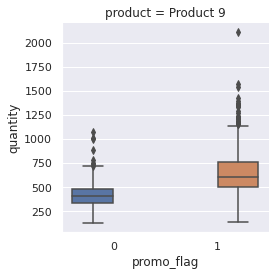

In [3]:
# As an example, for a product, plotting box plots by promo flags
product = 'Product 9'
example = ads[ads['product']==product].reset_index(drop=True)
sns.catplot(data=example, kind='box', col='product', x='promo_flag', y='quantity', hue='promo_flag', sharey=False, height=4)
%time

In [4]:
# Outlier Detection using IQR range concept of box plots for all products
ads_outliers = pd.DataFrame()

for product in list(ads['product'].drop_duplicates()):
    
    ads_subset = ads[ads['product']==product].reset_index(drop=True)

    promo_sales = ads_subset[ads_subset.promo_flag==1]
    no_promo_sales =ads_subset[ads_subset.promo_flag==0]

    q1_pc1, q3_pc1 = ads_subset[ads_subset.promo_flag==1]['quantity'].quantile([0.25, 0.75])
    iqr_pc1 = q3_pc1 - q1_pc1
    
    #print(q1_pc1,q3_pc1)
    # Calculate upper and lower bounds for outlier for pc1
    lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
    upper_pc1 = q3_pc1 + (1.5*iqr_pc1)
    
    #print(lower_pc1,upper_pc1)
    # Filter out the outliers from the pc1
    ads_subset['outlier_flag'] = np.where((ads_subset['promo_flag'] == 1) & ((ads_subset['quantity']> upper_pc1) | (ads_subset['quantity']< lower_pc1)),1,0)

    q1_pc1, q3_pc1 = ads_subset[ads_subset.promo_flag==0]['quantity'].quantile([0.25, 0.75])
    iqr_pc1 = q3_pc1 - q1_pc1
    # Calculate upper and lower bounds for outlier for pc1
    lower_pc1 = q1_pc1 - (1.5*iqr_pc1)
    upper_pc1 = q3_pc1 + (1.5*iqr_pc1)

    #print(lower_pc1,upper_pc1)
    ads_subset['outlier_flag'] = np.where((ads_subset['promo_flag'] == 0) & ((ads_subset['quantity']> upper_pc1) | 
                                                                             (ads_subset['quantity']< lower_pc1)),1,ads_subset['outlier_flag'])

    ads_subset['quantity'] = np.where(ads_subset['outlier_flag']==1,np.nan,ads_subset['quantity'])
    
    ads_outliers = ads_outliers.append(ads_subset)
%time

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.54 µs


In [5]:
list_1 = list(ads_outliers['product'].drop_duplicates())
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs


In [6]:
# Checking results for a product
ads_outliers[ads_outliers['product'] == 'Product 102']

,product,date,offer,offertype,quantity,sub category,category,unitretailprice,promo_flag,outlier_flag
0,Product 102,2017-04-26,25.0,P,NaN,Sub Category 35,Category 15,2.99,1,1
1,Product 102,2017-04-27,0.0,none,NaN,Sub Category 35,Category 15,2.99,0,1
2,Product 102,2017-04-28,0.0,none,NaN,Sub Category 35,Category 15,2.99,0,1
3,Product 102,2017-04-29,0.0,none,NaN,Sub Category 35,Category 15,2.99,0,1
4,Product 102,2017-04-30,0.0,none,NaN,Sub Category 35,Category 15,2.99,0,1
...,...,...,...,...,...,...,...,...,...,...
967,Product 102,2019-12-27,0.0,none,55.0,Sub Category 35,Category 15,2.99,0,0
968,Product 102,2019-12-28,0.0,none,NaN,Sub Category 35,Category 15,2.99,0,1
969,Product 102,2019-12-29,0.0,none,50.0,Sub Category 35,Category 15,2.99,0,0
970,Product 102,2019-12-30,0.0,none,51.0,Sub Category 35,Category 15,2.99,0,0


In [7]:
%store list_1
%time

Stored 'list_1' (list)
CPU times: user 0 ns, sys: 8 µs, total: 8 µs
Wall time: 7.39 µs


In [8]:
# Checking count of products in the outliers df
ads = ads_outliers
ads.drop(['promo_flag'],axis=1,inplace=True)
print("Outliers detected for "+str(len(ads['product'].drop_duplicates())) + " products!")
%store ads
%time

Outliers detected for 197 products!
Stored 'ads' (DataFrame)
CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 9.54 µs


In [9]:
# Checking for null values in the dataframe
ads[ads.isna().any(axis=1)]
%time

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.87 µs


In [10]:
# Saving results to a spreadsheet
ads_subset.to_csv('outliers.csv')
%time

CPU times: user 7 µs, sys: 1e+03 ns, total: 8 µs
Wall time: 16.2 µs
